In [15]:
import sys
sys.path.append('..')
import processing
import configs.common as cc
import configs.paths as paths
from models.classifier import Classifier
from train_classifier import get_all_targets
import torch
import json
import os

model_type = 'transformer_removed_meta'
# data_root = '/home/s203861/midi-classical-music/np_data/data'
data_root = f'/scratch/s203861/np_output/{model_type}'
band_folders = [d for d in os.listdir(data_root) if os.path.isdir(os.path.join(data_root, d))]
loader = processing.DatasetLoader(data_root)
dataloader = loader.get_dataloader_full()

In [2]:
from train import load_model
type = 'classifier'
model = Classifier()
pretrained = paths.config.paths.pretrained
model.load_state_dict(torch.load(cc.config.models.classifier))
model.to('cuda')
model.eval()

{'verbose': True, 'with_cuda': True, 'extra_ldflags': ['-L/opt/cuda/cuda-12.6/lib', '-lcublas'], 'extra_cflags': ['-DSLSTM_HIDDEN_SIZE=512', '-DSLSTM_BATCH_SIZE=8', '-DSLSTM_NUM_HEADS=4', '-DSLSTM_NUM_STATES=4', '-DSLSTM_DTYPE_B=float', '-DSLSTM_DTYPE_R=__nv_bfloat16', '-DSLSTM_DTYPE_W=__nv_bfloat16', '-DSLSTM_DTYPE_G=__nv_bfloat16', '-DSLSTM_DTYPE_S=__nv_bfloat16', '-DSLSTM_DTYPE_A=float', '-DSLSTM_NUM_GATES=4', '-DSLSTM_SIMPLE_AGG=true', '-DSLSTM_GRADIENT_RECURRENT_CLIPVAL_VALID=false', '-DSLSTM_GRADIENT_RECURRENT_CLIPVAL=0.0', '-DSLSTM_FORWARD_CLIPVAL_VALID=false', '-DSLSTM_FORWARD_CLIPVAL=0.0', '-U__CUDA_NO_HALF_OPERATORS__', '-U__CUDA_NO_HALF_CONVERSIONS__', '-U__CUDA_NO_BFLOAT16_OPERATORS__', '-U__CUDA_NO_BFLOAT16_CONVERSIONS__', '-U__CUDA_NO_BFLOAT162_OPERATORS__', '-U__CUDA_NO_BFLOAT162_CONVERSIONS__'], 'extra_cuda_cflags': ['-Xptxas="-v"', '-gencode', 'arch=compute_80,code=compute_80', '-res-usage', '--use_fast_math', '-O3', '-Xptxas -O3', '--extra-device-vectorization', '-DSL

Using /home/s203861/.cache/torch_extensions/py311_cu126 as PyTorch extensions root...
Detected CUDA files, patching ldflags
Emitting ninja build file /home/s203861/.cache/torch_extensions/py311_cu126/slstm_HS512BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0/build.ninja...
/home/s203861/newenv/lib/python3.11/site-packages/torch/utils/cpp_extension.py:2356: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Building extension module slstm_HS512BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


[1/7] /opt/cuda/cuda-12.6/bin/nvcc --generate-dependencies-with-compile --dependency-output slstm_forward.cuda.o.d -DTORCH_EXTENSION_NAME=slstm_HS512BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0 -DTORCH_API_INCLUDE_EXTENSION_H -DPYBIND11_COMPILER_TYPE=\"_gcc\" -DPYBIND11_STDLIB=\"_libstdcpp\" -DPYBIND11_BUILD_ABI=\"_cxxabi1016\" -isystem /home/s203861/newenv/lib/python3.11/site-packages/torch/include -isystem /home/s203861/newenv/lib/python3.11/site-packages/torch/include/torch/csrc/api/include -isystem /opt/cuda/cuda-12.6/include -isystem /home/s203861/.conda/envs/py311/include/python3.11 -D_GLIBCXX_USE_CXX11_ABI=1 -D__CUDA_NO_HALF_OPERATORS__ -D__CUDA_NO_HALF_CONVERSIONS__ -D__CUDA_NO_BFLOAT16_CONVERSIONS__ -D__CUDA_NO_HALF2_OPERATORS__ --expt-relaxed-constexpr -gencode=arch=compute_86,code=compute_86 -gencode=arch=compute_86,code=sm_86 --compiler-options '-fPIC' -Xptxas="-v" -gencode arch=compute_80,code=compute_80 -res-usage --use_fast_math -O3 -Xptxas -O3 --extra-device-ve

Loading extension module slstm_HS512BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0...
/home/s203861/xlstm/xlstm/blocks/slstm/cell.py:543: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @conditional_decorator(
/home/s203861/xlstm/xlstm/blocks/slstm/cell.py:568: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  @conditional_decorator(
Using /home/s203861/.cache/torch_extensions/py311_cu126 as PyTorch extensions root...
No modifications detected for re-loaded extension module slstm_HS512BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0, skipping build step...
Loading extension module slstm_HS512BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0...


{'verbose': True, 'with_cuda': True, 'extra_ldflags': ['-L/opt/cuda/cuda-12.6/lib', '-lcublas'], 'extra_cflags': ['-DSLSTM_HIDDEN_SIZE=512', '-DSLSTM_BATCH_SIZE=8', '-DSLSTM_NUM_HEADS=4', '-DSLSTM_NUM_STATES=4', '-DSLSTM_DTYPE_B=float', '-DSLSTM_DTYPE_R=__nv_bfloat16', '-DSLSTM_DTYPE_W=__nv_bfloat16', '-DSLSTM_DTYPE_G=__nv_bfloat16', '-DSLSTM_DTYPE_S=__nv_bfloat16', '-DSLSTM_DTYPE_A=float', '-DSLSTM_NUM_GATES=4', '-DSLSTM_SIMPLE_AGG=true', '-DSLSTM_GRADIENT_RECURRENT_CLIPVAL_VALID=false', '-DSLSTM_GRADIENT_RECURRENT_CLIPVAL=0.0', '-DSLSTM_FORWARD_CLIPVAL_VALID=false', '-DSLSTM_FORWARD_CLIPVAL=0.0', '-U__CUDA_NO_HALF_OPERATORS__', '-U__CUDA_NO_HALF_CONVERSIONS__', '-U__CUDA_NO_BFLOAT16_OPERATORS__', '-U__CUDA_NO_BFLOAT16_CONVERSIONS__', '-U__CUDA_NO_BFLOAT162_OPERATORS__', '-U__CUDA_NO_BFLOAT162_CONVERSIONS__'], 'extra_cuda_cflags': ['-Xptxas="-v"', '-gencode', 'arch=compute_80,code=compute_80', '-res-usage', '--use_fast_math', '-O3', '-Xptxas -O3', '--extra-device-vectorization', '-DSL

Using /home/s203861/.cache/torch_extensions/py311_cu126 as PyTorch extensions root...
No modifications detected for re-loaded extension module slstm_HS512BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0, skipping build step...
Loading extension module slstm_HS512BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0...


{'verbose': True, 'with_cuda': True, 'extra_ldflags': ['-L/opt/cuda/cuda-12.6/lib', '-lcublas'], 'extra_cflags': ['-DSLSTM_HIDDEN_SIZE=512', '-DSLSTM_BATCH_SIZE=8', '-DSLSTM_NUM_HEADS=4', '-DSLSTM_NUM_STATES=4', '-DSLSTM_DTYPE_B=float', '-DSLSTM_DTYPE_R=__nv_bfloat16', '-DSLSTM_DTYPE_W=__nv_bfloat16', '-DSLSTM_DTYPE_G=__nv_bfloat16', '-DSLSTM_DTYPE_S=__nv_bfloat16', '-DSLSTM_DTYPE_A=float', '-DSLSTM_NUM_GATES=4', '-DSLSTM_SIMPLE_AGG=true', '-DSLSTM_GRADIENT_RECURRENT_CLIPVAL_VALID=false', '-DSLSTM_GRADIENT_RECURRENT_CLIPVAL=0.0', '-DSLSTM_FORWARD_CLIPVAL_VALID=false', '-DSLSTM_FORWARD_CLIPVAL=0.0', '-U__CUDA_NO_HALF_OPERATORS__', '-U__CUDA_NO_HALF_CONVERSIONS__', '-U__CUDA_NO_BFLOAT16_OPERATORS__', '-U__CUDA_NO_BFLOAT16_CONVERSIONS__', '-U__CUDA_NO_BFLOAT162_OPERATORS__', '-U__CUDA_NO_BFLOAT162_CONVERSIONS__'], 'extra_cuda_cflags': ['-Xptxas="-v"', '-gencode', 'arch=compute_80,code=compute_80', '-res-usage', '--use_fast_math', '-O3', '-Xptxas -O3', '--extra-device-vectorization', '-DSL

Using /home/s203861/.cache/torch_extensions/py311_cu126 as PyTorch extensions root...
No modifications detected for re-loaded extension module slstm_HS512BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0, skipping build step...
Loading extension module slstm_HS512BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0...


Classifier(
  (token_embedding): Embedding(17890, 512)
  (output_layer): Linear(in_features=512, out_features=17890, bias=True)
  (layers): xLSTMBlockStack(
    (blocks): ModuleList(
      (0): mLSTMBlock(
        (xlstm_norm): LayerNorm()
        (xlstm): mLSTMLayer(
          (proj_up): Linear(in_features=512, out_features=2048, bias=False)
          (q_proj): LinearHeadwiseExpand(in_features=1024, num_heads=256, expand_factor_up=1, bias=False, trainable_weight=True, trainable_bias=True, )
          (k_proj): LinearHeadwiseExpand(in_features=1024, num_heads=256, expand_factor_up=1, bias=False, trainable_weight=True, trainable_bias=True, )
          (v_proj): LinearHeadwiseExpand(in_features=1024, num_heads=256, expand_factor_up=1, bias=False, trainable_weight=True, trainable_bias=True, )
          (conv1d): CausalConv1d(
            (conv): Conv1d(1024, 1024, kernel_size=(4,), stride=(1,), padding=(3,), groups=1024)
          )
          (conv_act_fn): SiLU()
          (mlstm_cell): 

In [16]:
successes = 0
tries = 0
results = {}
for band_idx, band in enumerate(band_folders):
    print(f"{band} : {band_idx} / {len(band_folders) - 1}", end="\r")
    results[band] = {}
    successes_band = 0
    tries_band = 0
    model_folder = os.path.join(data_root, band)
    num_files = sum([os.path.isfile(os.path.join(model_folder, f)) for f in os.listdir(model_folder)])
    if num_files < 2:
        print(f"Skipping {band} (not enough files: {num_files})")
        continue
    loader = processing.DatasetLoader(model_folder)
    dataloader = loader.get_dataloader_full()
    for batch_idx, (src, trg, meta) in enumerate(dataloader):
        guesses = model(src)[:,4:].argmax(-1) + 4
        answers = meta[:,0]
        equal_elements = (guesses == answers)
        successes_band += equal_elements.sum()
        tries_band += len(answers)
        # print(torch.topk(model(src)[:,4:], 3, dim=-1)[1] + 4)
    results[band]['successrate'] = float((successes_band / tries_band))
    results[band]['num_files'] = num_files
    tries += tries_band
    successes += successes_band

Le_thiere : 95 / 9555 95

In [17]:
successes / tries

tensor(0.0564, device='cuda:0')

In [5]:
with open(f'/scratch/s203861/logs/classifier_{model_type}.json', 'w') as f:
    json.dump(results, f, indent=2)

In [7]:
with open('/scratch/s203861/logs/classifier_mamba.json') as f:
    mamba = json.load(f)
with open('/scratch/s203861/logs/classifier_transformer.json') as f:
    transformer = json.load(f)
with open('/scratch/s203861/logs/classifier_xlstm.json') as f:
    xlstm = json.load(f)
with open('/scratch/s203861/logs/classifier_mamba_no_meta.json') as f:
    mamba_no_meta = json.load(f)
with open('/scratch/s203861/logs/classifier_transformer_no_meta.json') as f:
    transformer_no_meta = json.load(f)
with open('/scratch/s203861/logs/classifier_xlstm_no_meta.json') as f:
    xlstm_no_meta = json.load(f)
with open('/scratch/s203861/logs/classifier_mamba_removed_meta.json') as f:
    mamba_removed_meta = json.load(f)
with open('/scratch/s203861/logs/classifier_transformer_removed_meta.json') as f:
    transformer_removed_meta = json.load(f)
with open('/scratch/s203861/logs/classifier_xlstm_removed_meta.json') as f:
    xlstm_removed_meta = json.load(f)
with open('/scratch/s203861/logs/classifier_dataset.json') as f:
    dataset = json.load(f)
bands = sorted(set(mamba.keys()) & set(transformer.keys()) & set(xlstm.keys()) & set(dataset.keys()))
bands = [
    band for band in list(bands)
    if dataset[band]['successrate'] != 0.0
]
bands_with_numbers = [f"{band} ({dataset[band]['num_files']})" for band in bands]
mamba_rates = [mamba[band]['successrate'] for band in bands]
transformer_rates = [transformer[band]['successrate'] for band in bands]
dataset_rates = [dataset[band]['successrate'] for band in bands]
xlstm_rates = [xlstm[band]['successrate'] for band in bands if band]
transformer_no_meta_rates = [transformer_no_meta[band]['successrate'] for band in bands]
mamba_no_meta_rates = [mamba_no_meta[band]['successrate'] for band in bands]
xlstm_no_meta_rates = [xlstm_no_meta[band]['successrate'] for band in bands if band]
transformer_removed_meta_rates = [transformer_removed_meta[band]['successrate'] for band in bands]
mamba_removed_meta_rates = [mamba_removed_meta[band]['successrate'] for band in bands]
xlstm_removed_meta_rates = [xlstm_removed_meta[band]['successrate'] for band in bands if band]

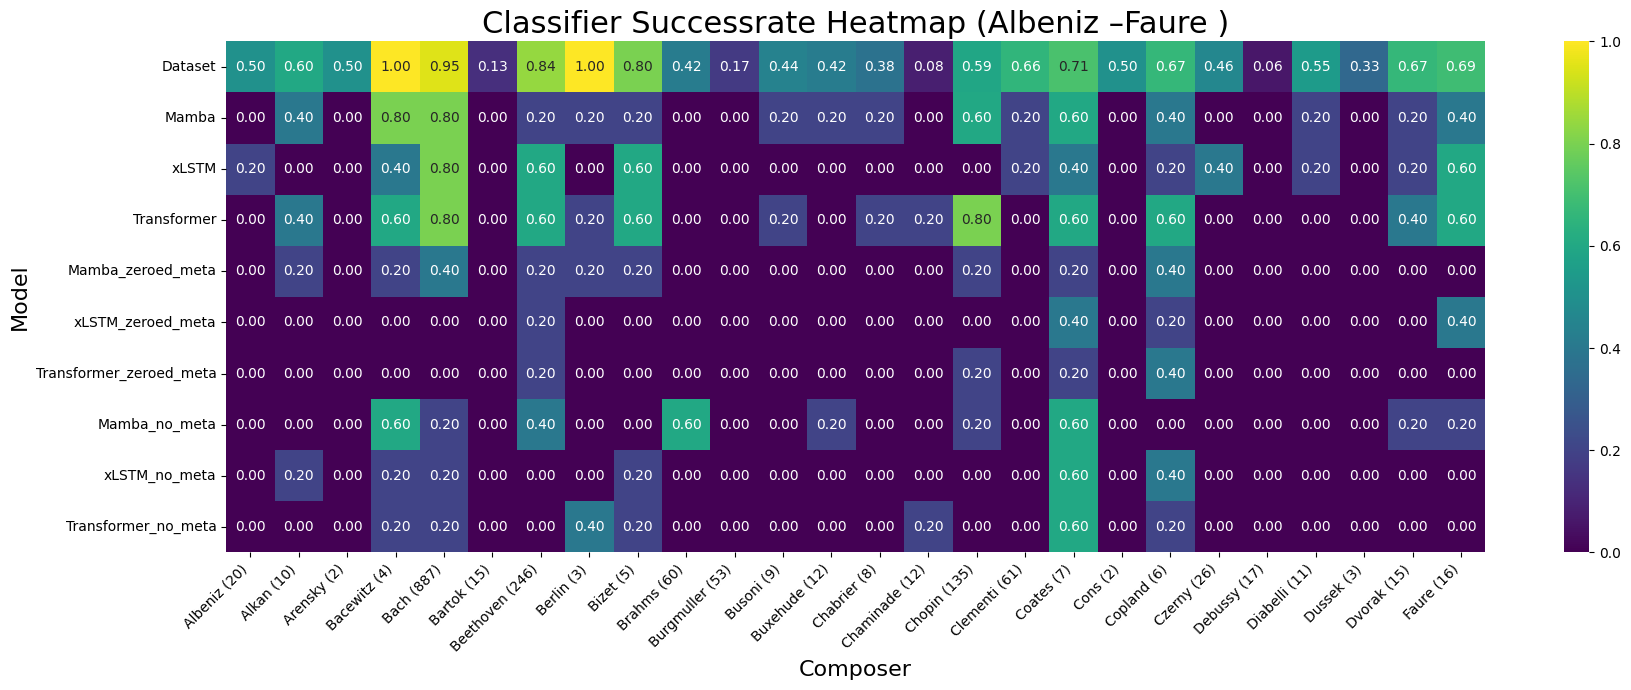

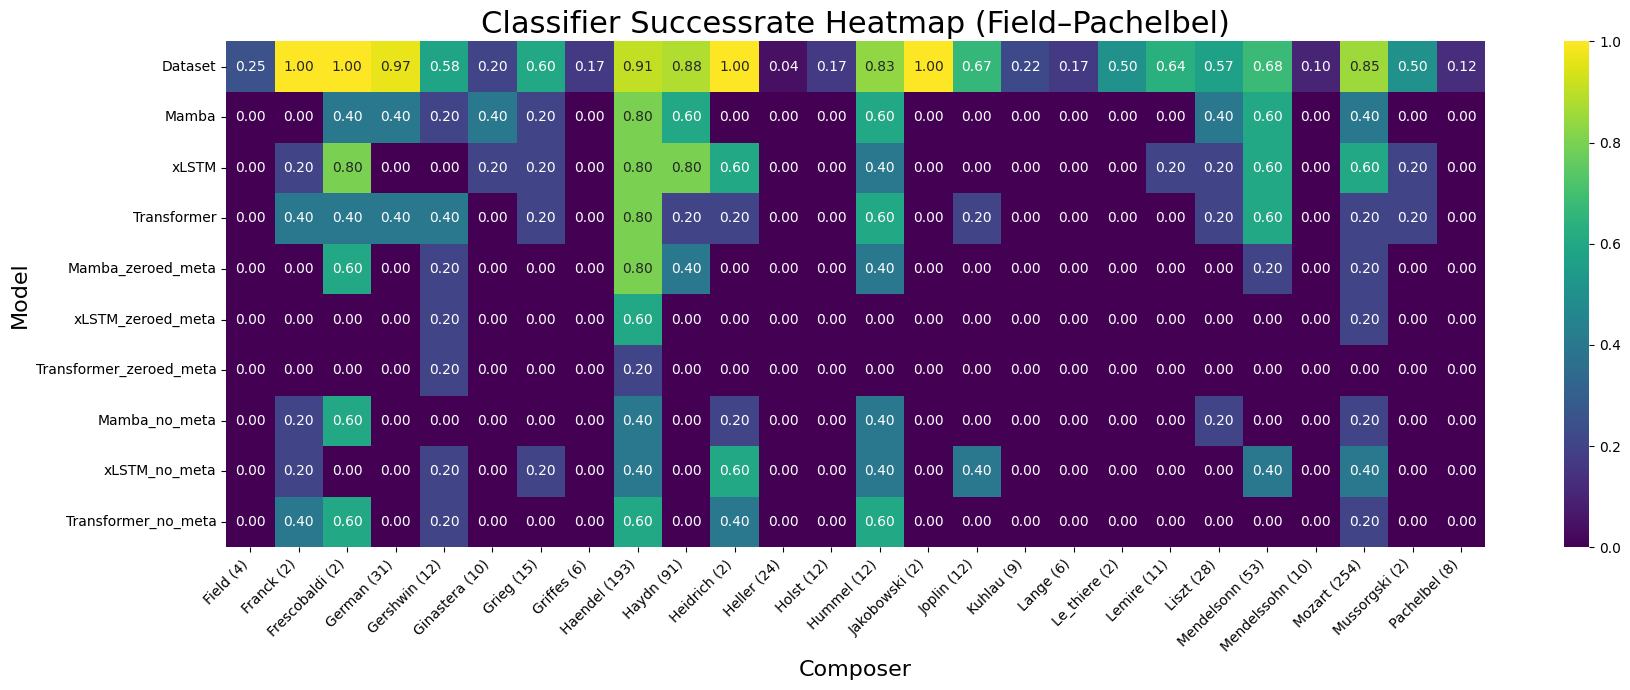

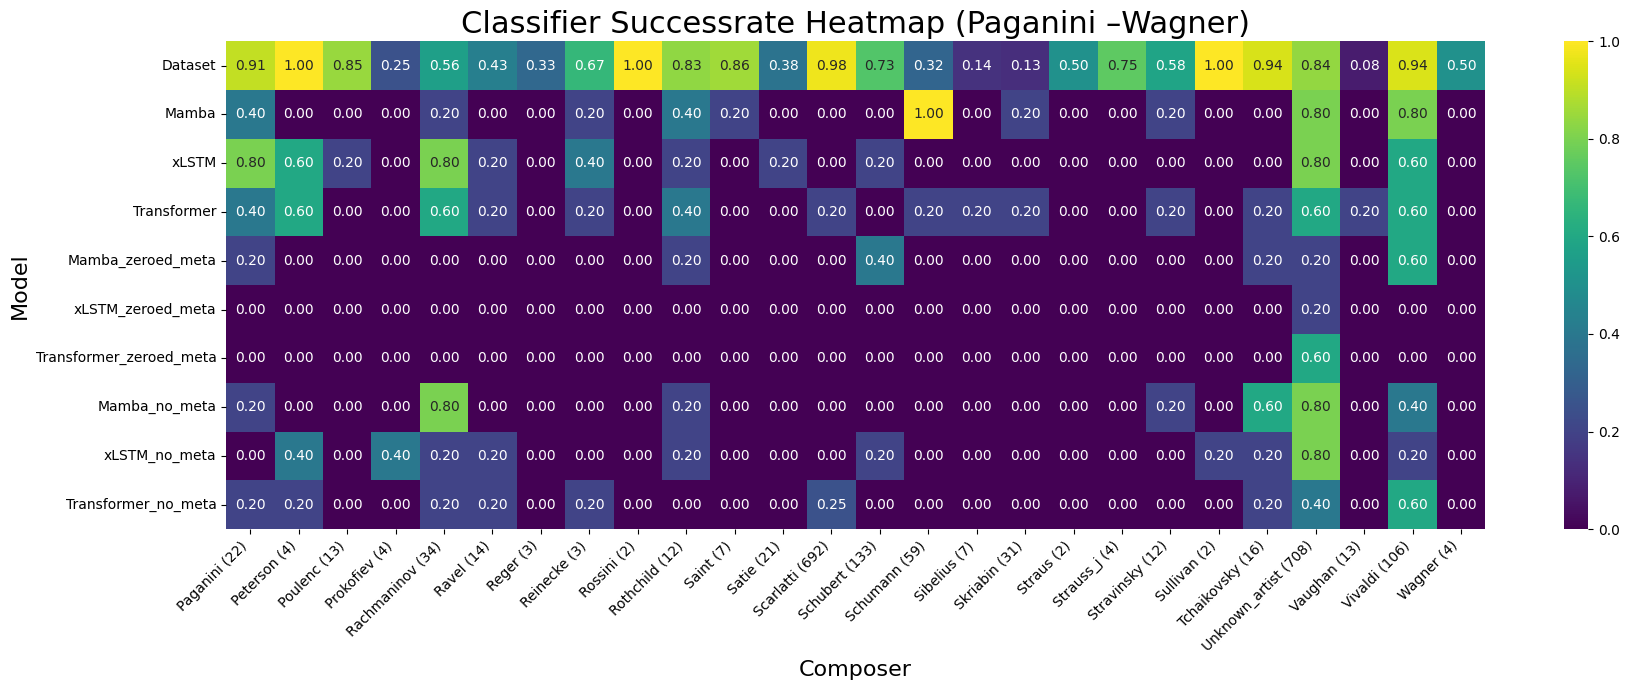

In [11]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Split bands_with_numbers into three chunks
n_total = len(bands_with_numbers)
n_split = math.ceil(n_total / 3)
band_splits = [bands_with_numbers[i*n_split:(i+1)*n_split] for i in range(3)]

data = {
    'Dataset': dataset_rates,
    'Mamba': mamba_rates,
    'xLSTM': xlstm_rates,
    'Transformer': transformer_rates,
    'Mamba_zeroed_meta': mamba_no_meta_rates,
    'xLSTM_zeroed_meta': xlstm_no_meta_rates,
    'Transformer_zeroed_meta': transformer_no_meta_rates,
    'Mamba_no_meta': mamba_removed_meta_rates,
    'xLSTM_no_meta': xlstm_removed_meta_rates,
    'Transformer_no_meta': transformer_removed_meta_rates,
}
df_full = pd.DataFrame(data, index=bands_with_numbers).T

for i, band_chunk in enumerate(band_splits):
    df_chunk = df_full[band_chunk]
    plt.figure(figsize=(min(len(band_chunk)*0.7, 25), 7))
    sns.heatmap(df_chunk, annot=True, fmt='.2f', cmap='viridis')
    plt.xlabel('Composer', fontsize=16)
    plt.ylabel('Model', fontsize=16)
    plt.title(f'Classifier Successrate Heatmap ({band_chunk[0][:-4]}–{band_chunk[-1][:-4]})', fontsize=22)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()